In [1]:

import os
import re
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def get_corpus(dir):
    my_list = get_txtname_list(dir)
    corpus = []
    for file_path in my_list:
        with open(file_path, encoding="utf8", errors='ignore') as f_input:
            corpus.append(f_input.read())
    return(pd.DataFrame(corpus,columns= ['text']))

In [0]:
def cleanSentences(text, remove_stopwords=True, stem_words=True):
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case and split them
    text = text.lower().replace("<br />", " ")
    text = text.split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

In [0]:
def get_txtname_list(dir):
    x = os.listdir(dir)
    my_list = [x for x in x if not '.zip' in x]
    for i in range(len(my_list)):
        my_list[i] = dir+my_list[i]+"/"+my_list[i]+".txt"
    return(my_list)
  
corp_child = get_corpus("/content/drive/My Drive/ENGLISH/CHILD/")
corp_child['genre'] = 'child'

In [0]:
def get_txtname_list(dir):
    x = os.listdir(dir)
    my_list = [x for x in x if not '.ZIP' in x]
    for i in range(len(my_list)):
        my_list[i] = dir+my_list[i]+"/"+my_list[i]+".txt"
    return(my_list)

In [0]:
corp_adven = get_corpus("/content/drive/My Drive/ENGLISH/ADVENTUR/")
corp_adven['genre'] = 'adven'

corp_fantast = get_corpus("/content/drive/My Drive/ENGLISH/FANTAST/")
corp_fantast['genre'] = 'fantast'

corp_detect = get_corpus("/content/drive/My Drive/ENGLISH/DETECT/")
corp_detect['genre'] = 'detect'

data = pd.concat([corp_adven, corp_child, corp_detect ,corp_fantast] ) 
data['text'] = data['text'].apply(cleanSentences)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


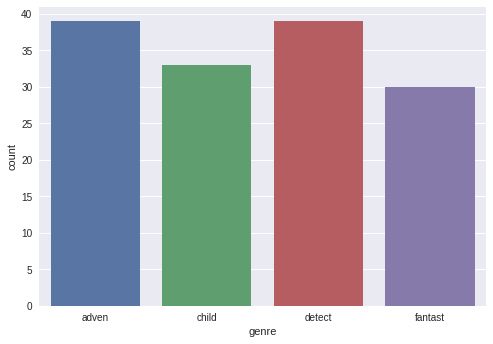

In [8]:
data = pd.concat([corp_adven, corp_child, corp_detect, corp_fantast] ) 
data['text'] = data['text'].apply(cleanSentences)
sns.countplot(data.genre)


In [0]:
data = shuffle(data)

In [0]:
from sklearn.model_selection import train_test_split
X = data['text']
Y = data['genre']
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, Y, test_size=0.1)

In [0]:
from tensorflow import keras
max_words = 8000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, char_level=False)

In [0]:
tokenize.fit_on_texts(X) 
x_train = tokenize.texts_to_matrix(X_train)
x_test = tokenize.texts_to_matrix(X_test)

In [0]:
encoder = LabelEncoder()
encoder.fit(Y)
y_train = encoder.transform(y_cat_train)
y_test = encoder.transform(y_cat_test)

In [0]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (126, 8000)
x_test shape: (15, 8000)
y_train shape: (126, 4)
y_test shape: (15, 4)


In [0]:
batch_size = 20
epochs = 13
drop_ratio = 0.5

In [0]:
from tensorflow import keras
layers = keras.layers
models = keras.models
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [18]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 113 samples, validate on 13 samples
Epoch 1/13
113/113 [==============================] - 2s 22ms/step - loss: 6.6694 - acc: 0.2478 - val_loss: 5.0316 - val_acc: 0.5385
Epoch 2/13
113/113 [==============================] - 0s 576us/step - loss: 6.2074 - acc: 0.4248 - val_loss: 5.0546 - val_acc: 0.4615
Epoch 3/13
113/113 [==============================] - 0s 621us/step - loss: 5.7705 - acc: 0.5044 - val_loss: 4.7556 - val_acc: 0.6923
Epoch 4/13
113/113 [==============================] - 0s 564us/step - loss: 5.0366 - acc: 0.6195 - val_loss: 5.2025 - val_acc: 0.5385
Epoch 5/13
113/113 [==============================] - 0s 573us/step - loss: 2.9129 - acc: 0.6903 - val_loss: 2.9914 - val_acc: 0.3077
Epoch 6/13
113/113 [==============================] - 0s 606us/step - loss: 1.4026 - acc: 0.7080 - val_loss: 1.0203 - val_acc: 0.7692
Epoch 7/13
113/113 [==============================] - 0s 583us/step - loss: 1.2962 - acc: 0.7876 - val_loss: 0.7124 - val_acc: 0.8462
Epoch 8/13
113/113

In [19]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

15/15 [==============================] - 0s 237us/step
Test loss: 0.5103185772895813
Test accuracy: 0.7333333492279053


In [21]:
txt = [cleanSentences(input())]
seq = tokenize.texts_to_matrix(txt)
text_labels = encoder.classes_ 
pred = model.predict(seq)
predicted_label = text_labels[np.argmax(pred)]
print('Text label:', text_labels)
print('Predicted probability:', pred)
print("Predicted genre: " + predicted_label + "\n") 

Who killed Sherlok Holmes
Text label: ['adven' 'child' 'detect' 'fantast']
Predicted probability: [[0.23171252 0.26054275 0.2540074  0.25373736]]
Predicted genre: child



In [71]:
pred = []
act = []
for i in range(15):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(X_test.iloc[i][:50], "...")
    print('Actual label:' + y_cat_test.iloc[i])
    print("Predicted label: " + predicted_label + "\n")
    
    pred.append(predicted_label)
    act.append(y_cat_test.iloc[i])

l frank baum wonder wizard oz introduct folklor le ...
Actual label:child
Predicted label: child

roald dahl fantast mr fox 1 three farmer valley th ...
Actual label:child
Predicted label: child

- - - - - - - - - - - - - - - - - - - - - - - - -  ...
Actual label:fantast
Predicted label: fantast

content chapter page carthori thuvia 7 ii slaveri  ...
Actual label:fantast
Predicted label: adven

uninvit part 1 - - - - - - - - - - - - - - - - kir ...
Actual label:fantast
Predicted label: child

stark munro letter seri twelv letter written j sta ...
Actual label:adven
Predicted label: detect

rex stout easter parad murder : imag 1 jpg chapter ...
Actual label:detect
Predicted label: detect

douglass frederick my escap slaveri centuri illust ...
Actual label:adven
Predicted label: detect

tragedi pudd nhead wilson mark twain whisper reade ...
Actual label:adven
Predicted label: adven

revolt cyberslav lawrenc dworin copyright 1991 law ...
Actual label:fantast
Predicted label: fantast

shad

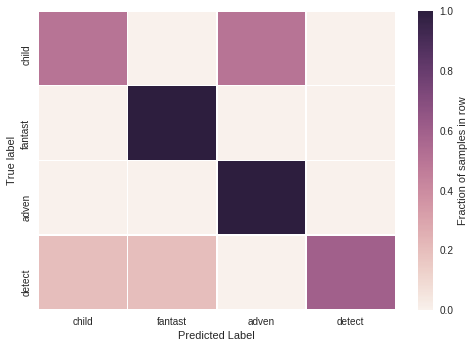

In [77]:
labels = pd.unique(pred)
conf_mat = confusion_matrix(act,pred)
conf_mat_norm = np.transpose(np.transpose(conf_mat)/np.sum(conf_mat,axis=1))

ax = sns.heatmap(conf_mat_norm,
            xticklabels=labels, yticklabels=labels,
            linewidths=.5, cbar_kws={'label': 'Fraction of samples in row'})
ax.set(xlabel = 'Predicted Label', ylabel='True label')

plt.show()

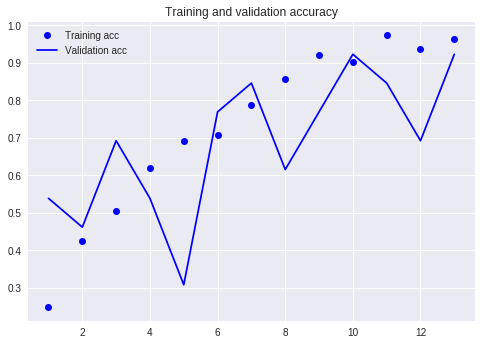

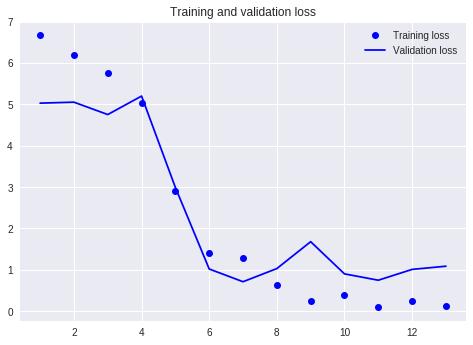

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()